In [1]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import tree
import random
import itertools

%matplotlib inline

In [2]:
cc = pd.read_csv('Data/Ready_for_ML/lnab_playoff.csv')
cc.set_index(['Series_ID'],inplace=True)

In [3]:
cc

,Year,Winner,Opponent 0,Homefield_advantage,Opponent 1,GF,PK SI,PK SI/GP,PK GA,PK GA/GP,...,10',GM,MP,PIM Total,PP OP,PP OP/GP,PP%,PPT,PP time/GP,Number of year
Series_ID,,,,,,,,,,,,,,,,,,,,,
0809_EV Zug Kloten Flyers,809,1,Kloten Flyers,1,EV Zug,3.0,-18.0,-0.36,-4.0,-0.08,...,11.0,-3.0,0.0,3.0,20.0,0.40,0.20,4586.0,92.0,0.0
0809_EV Zug SC Bern,809,1,EV Zug,0,SC Bern,-16.0,27.0,0.54,-5.0,-0.10,...,-2.0,0.0,-1.0,8.0,39.0,0.78,-5.01,4220.0,84.0,0.0
0809_Fribourg-Gottéron HC Davos,809,1,Fribourg-Gottéron,1,HC Davos,-30.0,-25.0,-0.50,11.0,0.22,...,4.0,-1.0,1.0,20.0,24.0,0.48,-3.74,3443.0,69.0,0.0
0809_Fribourg-Gottéron ZSC Lions,809,0,ZSC Lions,0,Fribourg-Gottéron,22.0,-31.0,-0.62,-17.0,-0.34,...,-4.0,0.0,-1.0,-134.0,-9.0,-0.18,4.81,-1737.0,-35.0,0.0
0809_Genève-Servette HC Kloten Flyers,809,0,Genève-Servette HC,1,Kloten Flyers,-17.0,26.0,0.52,0.0,0.00,...,0.0,0.0,2.0,120.0,-12.0,-0.24,-3.01,-3004.0,-60.0,0.0
0809_HC Davos HC Lugano,809,1,HC Davos,0,HC Lugano,9.0,14.0,0.28,-5.0,-0.10,...,-3.0,-1.0,-1.0,-97.0,-5.0,-0.10,-5.19,36.0,1.0,0.0
0809_HC Davos Kloten Flyers,809,1,Kloten Flyers,0,HC Davos,-10.0,-27.0,-0.54,-1.0,-0.02,...,8.0,1.0,0.0,65.0,45.0,0.90,-2.90,7321.0,146.0,0.0
0910_EHC Basel Sharks EHC Visp,910,0,EHC Basel Sharks,1,EHC Visp,-113.0,-10.0,-0.22,10.0,0.22,...,5.0,-3.0,-1.0,-67.0,-28.0,-0.62,-10.32,-1952.0,-43.0,0.0
0910_EHC Olten Lausanne HC,910,0,EHC Olten,0,Lausanne HC,21.0,-55.0,-1.22,-3.0,-0.06,...,-7.0,-3.0,0.0,-309.0,15.0,0.33,-2.17,3220.0,72.0,0.0


In [4]:
y = cc['Winner'].values
X = cc.drop(['Opponent 0', 'Winner', 'Year', 'Opponent 1'], axis=1)
X = X.values
X_norm = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

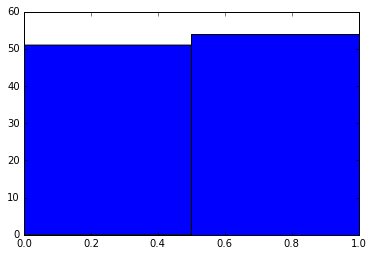

In [5]:
plt.hist(y, bins=2);

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),scoring='roc_auc'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MLP Classifier 

In [7]:
param_grid = {
    'solver':['lbfgs', 'adam'],
    'hidden_layer_sizes':[(10,), (20,), (30,), (40,), (50,), (60,), (70,), (80,), (90,), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'early_stopping': [True, False],
    'alpha': np.logspace(-4, -1, num=4),
    'max_iter': [1000, 2000]
}
clfncv = MLPClassifier()
cv_mlp = GridSearchCV(clfncv, param_grid, scoring='roc_auc', cv=5, verbose=2)
cv_mlp.fit(X_norm,y)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True, total=   0.2s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=True 
[CV]  alpha=0.0

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 
[CV]  a

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.7s
[CV] alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alp

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False, total=   0.7s
[CV] alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  a

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  a

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  a

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=logistic, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=logistic, early_stopping=False 
[CV]  a

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=False, total=   0.6s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, m

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.7s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.0

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=logistic, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=logistic, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=logistic, early_stopping=False 
[CV]  a

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=logistic, early_stopping=False 
[CV]  alpha=0.01, max_i

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=logistic, early_stopping=False 
[CV]  alpha=0.01, max_i

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.9s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=ad

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.6s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.6s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.0001, max_iter=

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs,

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.6s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.6s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidde

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs,

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs,

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidde

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.6s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_lay

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_lay

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_lay

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_lay

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.2s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.2s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_size

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.1s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False, total=   0.2s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False, total=   0.2s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False, total=   0.2s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(6

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.7s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(8

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.6s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.6s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False, total=   0.6s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.6s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.7s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.7s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=tanh, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.8s
[CV] alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.0001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solv

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=l

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, so

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.0001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.0001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.0001, max_iter=

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.2s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, h

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=lbfgs, h

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.7s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.7s
[CV] alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.001, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=lbfgs, hid

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lbfg

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.001, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.001, max_iter=2000, solver=lb

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.01, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.2s
[CV] alpha=0.01, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.7s
[CV] alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.7s
[CV] alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.01, max_iter=1000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=lbfgs, hidden_layer

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.7s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.8s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.8s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   1.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   1.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   1.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   1.1s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   1.0s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   1.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   1.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   1.3s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   1.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   1.3s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   1.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   1.4s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   1.5s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.01, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   1.5s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   1.5s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   1.2s
[CV] alpha=0.01, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.01, max_iter=2000, solver=lbfgs

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(10,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(20,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.7s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False, total=   0.6s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(30,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.8s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False, total=   0.8s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(40,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   1.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   1.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False, total=   1.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(50,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   0.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   1.1s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False, total=   1.0s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(60,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_size

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   1.2s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False, total=   1.2s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(70,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_si

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   0.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   1.3s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False, total=   1.2s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(80,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_size

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   1.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False, total=   1.4s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(90,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_size

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=1000, solver=adam, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   0.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False, total=   1.5s
[CV] alpha=0.1, max_iter=2000, solver=lbfgs, hidden_layer_sizes=(100,), activation=relu, early_stopping=False 
[CV]  alpha=0.1, max_iter=2000, solver=lbfgs, hidden_laye

[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 18.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,), (60,), (70,), (80,), (90,), (100,)], 'alpha': array([ 0.0001,  0.001 ,  0.01  ,  0.1   ]), 'solver': ['lbfgs', 'adam'], 'max_iter': [1000, 2000], 'activation': ['logistic', 'tanh', 'relu'], 'early_stopping': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [8]:
print('Best score obtained: ', cv_mlp.best_score_,'\nwith parameters: ', cv_mlp.best_params_)

Best score obtained:  0.664935064935 
with parameters:  {'alpha': 0.01, 'max_iter': 2000, 'solver': 'adam', 'hidden_layer_sizes': (80,), 'activation': 'logistic', 'early_stopping': True}


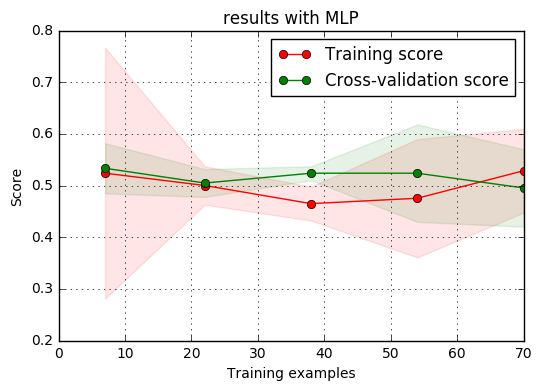

In [23]:
good_model = MLPClassifier(hidden_layer_sizes=(60,), early_stopping=True, activation='logistic', max_iter=1000, alpha=0.001, solver='adam',)
plot_learning_curve(good_model, 'results with MLP', X, y, scoring='accuracy');

In [28]:
good_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(60,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [52]:
cross_val_score(good_model, X, y, cv =5, scoring='accuracy')

array([ 0.72727273,  0.38095238,  0.47619048,  0.47619048,  0.4       ])

Confusion matrix, without normalization
[[ 5  4]
 [10  8]]


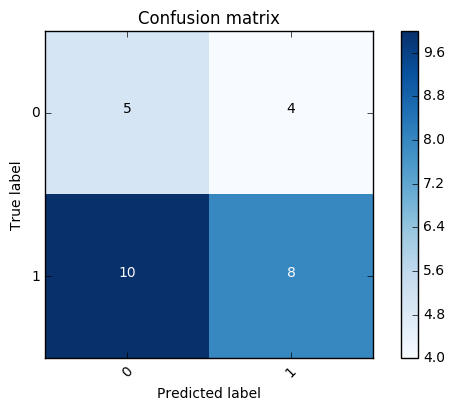

In [53]:
y_preds = good_model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_preds), classes=[0,1])

## SVM

In [16]:
svm_model = svm.SVC()
param_grid = {
    'C': np.logspace(-2, 2, 5),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5],
    'gamma': np.logspace(-3, 2, 6)
}
cv_svm = GridSearchCV(svm_model, param_grid, scoring='roc_auc', n_jobs=1, cv=5, verbose=2)
cv_svm.fit(X_norm, y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] kernel=linear, C=0.01, gamma=0.001, degree=3 ....................
[CV] ..... kernel=linear, C=0.01, gamma=0.001, degree=3, total=   0.0s
[CV] kernel=linear, C=0.01, gamma=0.001, degree=3 ....................
[CV] ..... kernel=linear, C=0.01, gamma=0.001, degree=3, total=   0.0s
[CV] kernel=linear, C=0.01, gamma=0.001, degree=3 ....................
[CV] ..... kernel=linear, C=0.01, gamma=0.001, degree=3, total=   0.0s
[CV] kernel=linear, C=0.01, gamma=0.001, degree=3 ....................
[CV] ..... kernel=linear, C=0.01, gamma=0.001, degree=3, total=   0.0s
[CV] kernel=linear, C=0.01, gamma=0.001, degree=3 ....................
[CV] ..... kernel=linear, C=0.01, gamma=0.001, degree=3, total=   0.0s
[CV] kernel=poly, C=0.01, gamma=0.001, degree=3 ......................
[CV] ....... kernel=poly, C=0.01, gamma=0.001, degree=3, total=   0.0s
[CV] kernel=poly, C=0.01, gamma=0.001, degree=3 ......................
[CV] ....... 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....... kernel=linear, C=0.01, gamma=0.1, degree=3, total=   0.0s
[CV] kernel=linear, C=0.01, gamma=0.1, degree=3 ......................
[CV] ....... kernel=linear, C=0.01, gamma=0.1, degree=3, total=   0.0s
[CV] kernel=poly, C=0.01, gamma=0.1, degree=3 ........................
[CV] ......... kernel=poly, C=0.01, gamma=0.1, degree=3, total=   0.0s
[CV] kernel=poly, C=0.01, gamma=0.1, degree=3 ........................
[CV] ......... kernel=poly, C=0.01, gamma=0.1, degree=3, total=   0.0s
[CV] kernel=poly, C=0.01, gamma=0.1, degree=3 ........................
[CV] ......... kernel=poly, C=0.01, gamma=0.1, degree=3, total=   0.0s
[CV] kernel=poly, C=0.01, gamma=0.1, degree=3 ........................
[CV] ......... kernel=poly, C=0.01, gamma=0.1, degree=3, total=   0.0s
[CV] kernel=poly, C=0.01, gamma=0.1, degree=3 ........................
[CV] ......... kernel=poly, C=0.01, gamma=0.1, degree=3, total=   0.0s
[CV] kernel=rbf, C=0.01, gamma=0.1, degree=3 .........................
[CV] .

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   11.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02]), 'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'degree': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [17]:
print('Best score obtained: ', cv_svm.best_score_,'\nwith parameters: ', cv_svm.best_params_)

Best score obtained:  0.648051948052 
with parameters:  {'kernel': 'sigmoid', 'C': 10.0, 'gamma': 0.10000000000000001, 'degree': 3}
